# Chapter 1 - Fundamentals of Risk Management

- Risk (McNeil, Alexander, and Paul 2025): Any event or action that may adversely affect an organization's ability to achieve its objectives and execute its strategies or, alternatively, the quantifiable likelihood of loss or less-than-expected returns. 

## Return

There is a trade-off between risk and return:
- The higher the assumed risk, the greater the realized return.

Risk is determined by the standard deviation, $\sigma_{R_i}$, idea introduced by Markowitz

$$ \sigma = \sqrt{\mathbf{E}(R^2)-[\mathbf{E}(R)]^2}$$


where $R$ and $\mathbf{E}$ are the annual return and expectation

When it comes to portfolio variance, covariance $Cov$ is fundamental, and the formula turns out:

$$ \sigma_p^2=w_a^2 \sigma_a ^2 + 2w_b ^2 \sigma _b ^2 Cov(r_a,r_b)

where $w$ is the weight, $\sigma^2$ the variance, and $Cov$ the covariance matrix

In [57]:
import statsmodels.api as sm
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly
import warnings
warnings.filterwarnings("ignore")

In [108]:
n_assets=5
n_simulation=100

In [109]:
returns = np.random.randn(n_assets, n_simulation)

In [110]:
rand = np.random.rand(n_assets)
weights=rand/sum(rand)

In [111]:
def port_return(returns):
    rets = np.mean (returns, axis=1)
    cov = np.cov(rets.T, aweights=weights, ddof=1)
    portfolio_returns = np.dot(weights, rets.T)
    portfolio_std_dev=np.sqrt(np.dot(weights, np.dot(cov, weights)))
    return portfolio_returns, portfolio_std_dev


In [112]:
portofolio_returns, portfolio_std_dev = port_return(returns)

In [113]:
print(portofolio_returns, portfolio_std_dev)

0.05442497712520821 0.070749509872819


In [114]:
portfolio = np.array([port_return(np.random.randn(n_assets, i))
                     for i in range(1, 101)])

In [115]:
best_fit = sm.OLS(portfolio[:,1], sm.add_constant(portfolio[:,0])).fit().fittedvalues

In [117]:
fig = go.Figure()
fig.add_trace(go.Scatter(name="Risk-Return Tradeoff",
                         x=portfolio[:,0],
                         y=portfolio[:,1], mode="markers"))
fig.add_trace(go.Scatter(name="Best Fit Line",
                         x=portfolio[:,0],
                         y=best_fit, mode="lines"))
fig.update_layout(xaxis_title="Return",
                  yaxis_title="Risk (Std Dev)",
                  width=900, height=470)
fig.show()

Personal Notes:
- A person with zero knowledge in finance can be certain of one thing in this graph:



 Return-Risk tradeoff can be intuitively known, but the numerical tendency is clearly not linear nor simple, trying different seeds make a completly different best line

## Framework of Risk Management

- Ignore: The company accepts all risks and their consequences
- Transfer: Transferring the risks to a third party by hedging or some other way
- Mitigate: Developing strategies to mitigate risk
- Accept: Assuming certain risks arising from some activities bring value to shareholders

### Main Financial Risks

- Market Risk
- Credit Risk
- Liquidity Risk: 
- Operational Risk:

## Information Asymmetry in Financial Risk Management

In [120]:
import matplotlib.pyplot as plt
import numpy as np


In [121]:
def utility(x):
    return(np.exp(x ** gamma))

In [122]:
pi = np.random.uniform(0,1,20)
pi =np.sort(pi)

In [123]:
print("The highest three probabilities of losses are {}".format(pi[-3:]))

The highest three probabilities of losses are [0.90546381 0.97308267 0.98130831]


In [124]:
y=2
c=1.5
Q=5
D=0.01
gamma=0.4

In [129]:
def demand (D):
    return(np.sum(utility(y-D)>pi * utility(y-c) + (1-pi)*utility(y)))

In [130]:
def supply(Q):
    return(np.mean(pi[-Q:])*c)

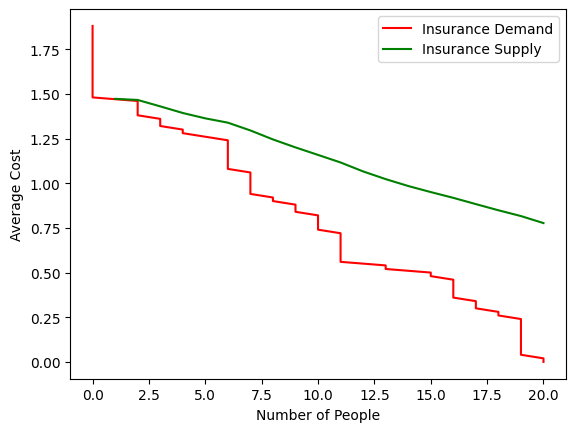

In [132]:
plt.figure()
plt.plot([demand(i) for i in np.arange(0, 1.9, 0.02)],
         np.arange(0, 1.9, 0.02),
         "r", label = "Insurance Demand")
plt.plot(range(1,21), [supply(j) for j in range (1,21)],
         "g", label = "Insurance Supply")
plt.ylabel("Average Cost")
plt.xlabel("Number of People")
plt.legend()
plt.show()